# Sesion 12 - Continuación Regresión

In [2]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Leer base de datos de train
train = pd.read_csv("train.csv")

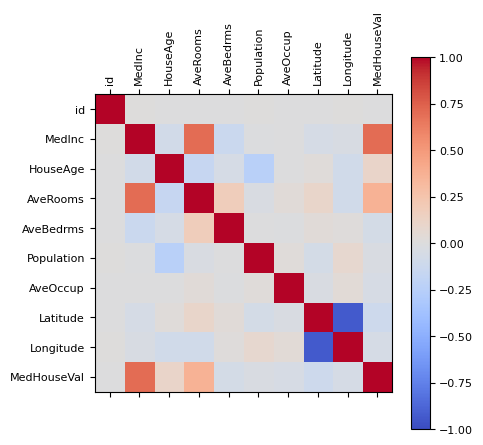

In [4]:
#Correlaciones

plt.matshow(train.corr(), cmap="coolwarm",vmin=-1, vmax=1)
##algunos arreglos gráficos
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=8, rotation=90)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
#plt.title('Matriz de Correlaciones', fontsize=16);
plt.show()

In [5]:
#CREANDO MODELOS BASICOS
#un modelo con variables elegidas (preespecificado)
modelo0=ols("MedHouseVal~ MedInc + HouseAge + AveRooms",data=train)


In [6]:
resultado0 = modelo0.fit()
print(resultado0.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 1.464e+04
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:19:30   Log-Likelihood:                -43664.
No. Observations:               37137   AIC:                         8.734e+04
Df Residuals:                   37133   BIC:                         8.737e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6708      0.022     30.513      0.0

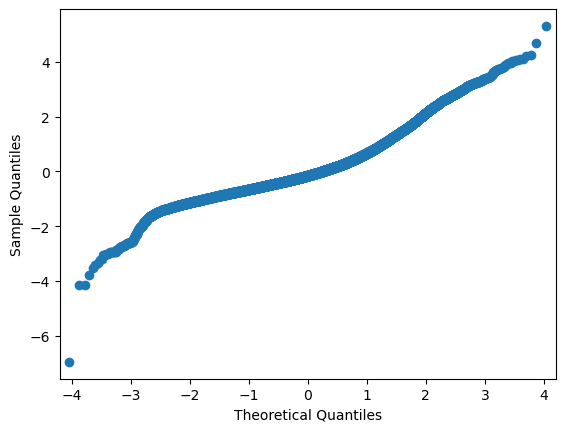

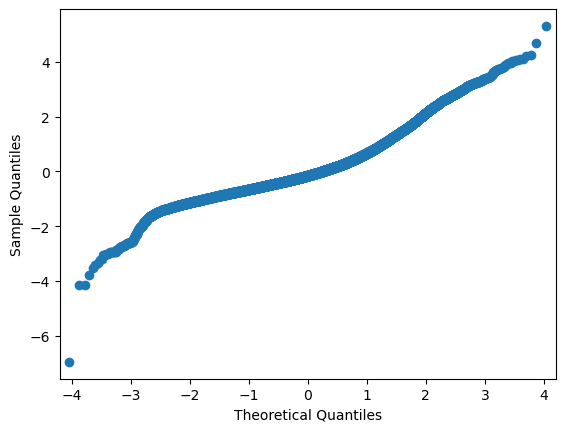

In [7]:
sm.qqplot(resultado0.resid)

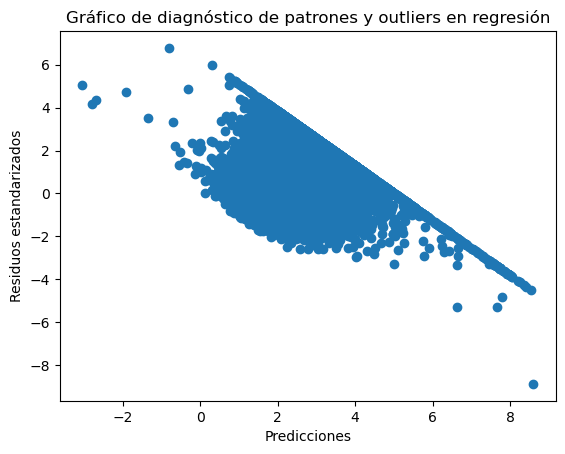

In [8]:
plt.scatter(resultado0.fittedvalues,resultado0.resid_pearson)
plt.title("Gráfico de diagnóstico de patrones y outliers en regresión")
plt.xlabel('Predicciones')
plt.ylabel('Residuos estandarizados')
plt.show()

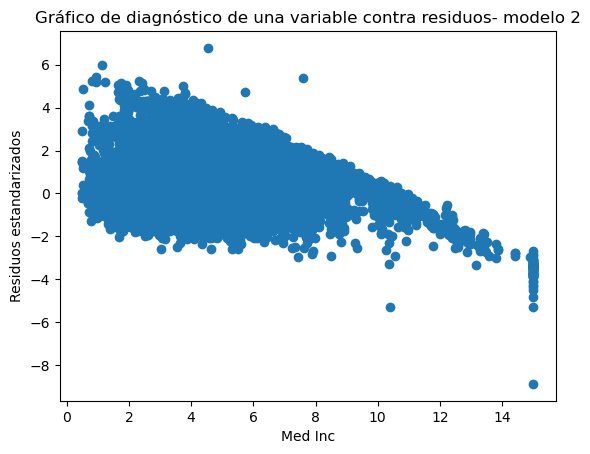

In [9]:
plt.scatter(train["MedInc"],resultado0.resid_pearson)
plt.title("Gráfico de diagnóstico de una variable contra residuos- modelo 2")
plt.xlabel('Med Inc')
plt.ylabel('Residuos estandarizados')
plt.show()

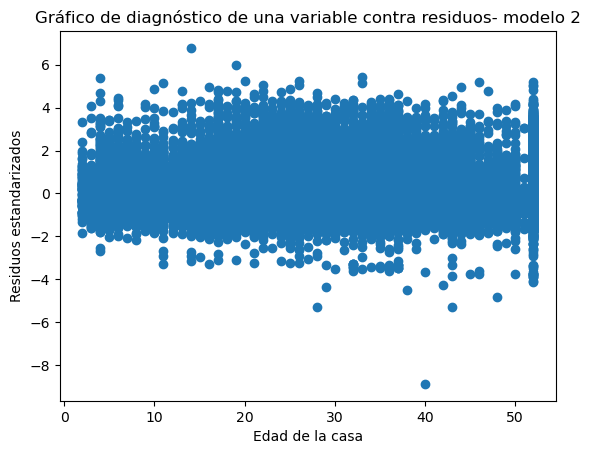

In [10]:
plt.scatter(train["HouseAge"],resultado0.resid_pearson)
plt.title("Gráfico de diagnóstico de una variable contra residuos- modelo 2")
plt.xlabel('Edad de la casa')
plt.ylabel('Residuos estandarizados')
plt.show()

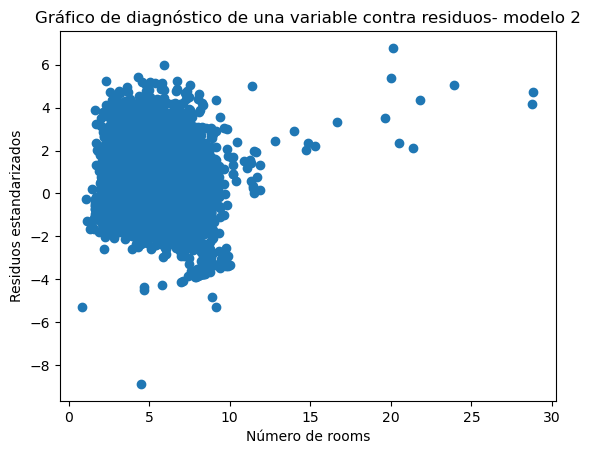

In [11]:
plt.scatter(train["AveRooms"],resultado0.resid_pearson)
plt.title("Gráfico de diagnóstico de una variable contra residuos- modelo 2")
plt.xlabel('Número de rooms')
plt.ylabel('Residuos estandarizados')
plt.show()

## Regularización

In [4]:
train

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
# Drop irrelevant columns
train = train.drop(columns=['id'])

In [6]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [7]:
# Separate numerical and categorical features
num_features = train.select_dtypes(include=['float64', 'int64']).columns.drop('MedHouseVal')
cat_features = train.select_dtypes(include=['object']).columns

In [8]:
num_features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [9]:
cat_features

Index([], dtype='object')

In [12]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

In [13]:
# Split data into train 
X_train = train.drop(columns=['MedHouseVal'])
y_train = train['MedHouseVal']

In [14]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41
...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44
37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98


In [15]:
y_train

0        0.980
1        0.946
2        1.576
3        1.336
4        4.500
         ...  
37132    1.856
37133    1.588
37134    3.387
37135    1.592
37136    0.652
Name: MedHouseVal, Length: 37137, dtype: float64

In [16]:
# Ridge Regression
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

ridge_params = {'ridge__alpha': np.logspace(-3, 3, 50)}
ridge_grid = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# Best Ridge model
print("Best Ridge Alpha:", ridge_grid.best_params_['ridge__alpha'])
ridge_best = ridge_grid.best_estimator_

Best Ridge Alpha: 0.001


In [17]:
# Lasso Regression
lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

lasso_params = {'lasso__alpha': np.logspace(-3, 3, 50)}
lasso_grid = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

# Best Lasso model
print("Best Lasso Alpha:", lasso_grid.best_params_['lasso__alpha'])
lasso_best = lasso_grid.best_estimator_

Best Lasso Alpha: 0.21209508879201905


In [19]:
# Elastic Net Regression
elastic_net_model = Pipeline([
    ('preprocessor', preprocessor),
    ('elasticnet', ElasticNet())
])

elastic_params = {
    'elasticnet__alpha': np.logspace(-3, 3, 50),
    'elasticnet__l1_ratio': np.linspace(0.1, 0.9, 9)
}

elastic_grid = GridSearchCV(elastic_net_model, elastic_params, scoring='neg_mean_squared_error', cv=5)
elastic_grid.fit(X_train, y_train)

# Best Elastic Net model
print("Best Elastic Net Params:", elastic_grid.best_params_)
elastic_best = elastic_grid.best_estimator_

Best Elastic Net Params: {'elasticnet__alpha': np.float64(0.21209508879201905), 'elasticnet__l1_ratio': np.float64(0.9)}
